# Facial Recognition

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/ACmydtFDTGs", width='622', height='466')

### Convolutal Neural Networks - How computers see images

### Convolution

<b>To Convolve means to roll together</b><br/><br/>
In the context of mathematics think of it as a way of mixing two functions by multiplying them.<br/><br/>

Convolutional neural networks make use of linear algebra to identify patterns using the pixel values (intensity of R,G, or B). By taking a small matrix and moving it across an image and multiplying them together every time it moves our network can mathematically identify patterns in these images. This small matrix is known as a <b>"kernel"</b> or <b>"filter"</b> and each one is designed to identify a particular pattern in an image (edges, shapes, etc.)

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
X_train = X_train.reshape(60000, 784).astype('float')
X_test = X_test.reshape(10000, 784).astype('float')

In [26]:
X_train /= 255.
X_test /= 255.

In [ ]:
# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

In [32]:
X_train.shape

(60000, 28, 28)

Label: 5


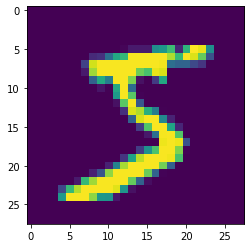

In [30]:
sample_image = X_train[0]
sample_label =y_train[0]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

When a filter is "rolled over" an image the resulting matrix is called a <b>Feature Map</b> - literally a map of where each pattern of feature is in the image. Elements with higher values indicate the presence of that pattern the filter is looking. 

The values (or weights) of the filter are adjusted during back-propagation.

Every node in a neural network layer is a different filter looking for a certain pattern. 

<h3>Parameters</h4>

<b>Padding</b> - Sometimes it is convenient to pad the input volume with zeros around the border. Helps with detecting patterns at the edge of an image. 

<b>Stride</b> - The number of pixels to shift the filter on each "roll". The larger the stride the smaller the feature map will be - but we will lose more information.

In [11]:
model_1 = Sequential()
model_1.add(Dense(64, activation='tanh', input_shape=(784,)))
model_1.add(Dense(10, activation='softmax'))

In [12]:
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Pooling

The feature maps are fed into a max pool layer, and like convolutions, this method is applied one patch at a time (usually 2x2). Max pooling simply takes the largest value from one patch of an image, places it in a new matrix next to the max values from other patches, and discards the rest of the information contained in the activation maps. Other methods exist such as average pooling (taking an average of the patch). 


This process results in a new feature map with reduced dimensionality that is then passed into another convolution layer to continue the pattern finding process. These steps are repeated until they are passed to a fully connected layer that proceeds to classify the image using the identified patterns. 

In [ ]:
results_1 = model_1.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

### Classification

Once the neural networks has collected a series of patterns that an image contains it is ready to make a guess as to what the image is. In order to do so, it starts by flattening the 2D matrix into a 1D vector, so it can be passed into a normal densely connected layer for classification. Then using this vector one or many densely connected layers will make a prediction as to what the image is. 

In [15]:
model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(784,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(10, activation='softmax'))

In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [ ]:
results_2 = model_2.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))

In [19]:
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(784,)))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results_3 = model_3.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

### Transfer Learning

Transfer learning is the process of training the last few layers of a pre-trained model to make classifications for a specific use case. This is not exclusive to CNNs but can be applied other neural networks and ML models. Pre-trained CNN models have dozens to hundreds of layers that have been trained on millions of images. Through this training they are very good at identifying complex patterns in image and these collection of patterns can then be used to train the final densely connected layers to make a specific classification. Examples of these pre-trained models include ResNet, InceptionNet, VGG16 - many of which are available through Keras. 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = '{}train'.format(new_root_dir)

validation_dir = '{}val/'.format(new_root_dir)
test_dir = '{}test/'.format(new_root_dir)

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=20, 
                                                        class_mode='categorical')

In [ ]:
mport datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50)

end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)

In [ ]:
# Initialize Base
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(240, 240, 3))

# Define Model Architecture
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

cnn_base.trainable = False

# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(model.trainable_weights))

model.summary()

In [ ]:
# Preprocessing/Problem Setup
new_root_dir = 'data_org_subset/'

train_dir = '{}train'.format(new_root_dir)
validation_dir = '{}val/'.format(new_root_dir)
test_dir = '{}test/'.format(new_root_dir)

original_start = datetime.datetime.now()
start = datetime.datetime.now()

# Define Initial Parameters (same as previous code block)
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10

# Get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(240, 240), 
                                                    batch_size= 20,
                                                    class_mode='categorical') 

# Get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_dir, 
                                                                       target_size=(240, 240), 
                                                                       batch_size=20,
                                                                       class_mode='categorical')

# Get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir, 
                                                                        target_size=(240, 240), 
                                                                        batch_size=180,
                                                                        class_mode='categorical',
                                                                        shuffle=False)

        
test_images, test_labels = next(test_generator)


# Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

# Fitting the Model
history = model.fit_generator(train_generator,
                              steps_per_epoch=8,
                              epochs=4,
                              validation_data=val_generator,
                              validation_steps=10)


end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(240, 240),
                                                  batch_size=20,
                                                  class_mode='categorical',
                                                  shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

### Code 

https://colab.research.google.com/drive/1UVXHMkm_hzvT_WV1Au6CieKwR9wwRgFQ?usp=sharing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [ ]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=50,
                    validation_data=(X_val, y_val))

In [ ]:
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Resources

https://skymind.ai/wiki/convolutional-network

https://cs231n.github.io/convolutional-networks/

https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9

